In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from scipy.io import arff
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.stats import norm
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn import tree

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
II. Data Understanding</p><br>

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Load a Dataframe:</p><br>

In [10]:

# importer les données
train_df = pd.DataFrame(arff.loadarff('KDDTrain+.arff')[0])
test_df = pd.DataFrame(arff.loadarff('KDDTest+.arff')[0])

### Decoder byte strings en ordinary strings: pour éviter les b'' sur les valeurs de chaines de caractères
print('Decoding byte strings into ordinary strings. (for train data)')
strings = train_df.select_dtypes([object])
strings = strings.stack().str.decode('utf-8').unstack()
for column in strings:
    train_df[column] = strings[column]

    
print('Decoding byte strings into ordinary strings. (for test data)')
strings = test_df.select_dtypes([object])
strings = strings.stack().str.decode('utf-8').unstack()
for column in strings:
    test_df[column] = strings[column]


Decoding byte strings into ordinary strings. (for train data)
Decoding byte strings into ordinary strings. (for test data)


In [11]:
train_target = pd.read_csv('train_target.csv')

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
1.Informations sur dataset</p><br>

In [682]:
train_target.shape

(49610, 1)

In [683]:
test_df.shape

(22544, 42)

In [684]:
train_df.shape

(125973, 42)

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Observation:</strong> <br>
    L'importation de nos trois fichiers de travail montre que: <br>.    
test_df est un ensemble de données de test avec 22,544 exemples et 42 colonnes représentant différentes caractéristique <br>s    .
train_df est un ensemble d'apprentissage avec 125,973 exemples et 42 colonne<br> 
    s, qu'on va utiliser pour former notre modèle d'apprentissage automatiqu    </div>

In [685]:
test_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [7]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

<h2> 3.2 Data processing </h2>

In [687]:
train_df.select_dtypes([object])


,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login,class
0,tcp,ftp_data,SF,0,0,0,0,normal
1,udp,other,SF,0,0,0,0,normal
2,tcp,private,S0,0,0,0,0,anomaly
3,tcp,http,SF,0,1,0,0,normal
4,tcp,http,SF,0,1,0,0,normal
...,...,...,...,...,...,...,...,...
125968,tcp,private,S0,0,0,0,0,anomaly
125969,udp,private,SF,0,0,0,0,normal
125970,tcp,smtp,SF,0,1,0,0,normal
125971,tcp,klogin,S0,0,0,0,0,anomaly


In [688]:
test_df.select_dtypes([object])


,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login,class
0,tcp,private,REJ,0,0,0,0,anomaly
1,tcp,private,REJ,0,0,0,0,anomaly
2,tcp,ftp_data,SF,0,0,0,0,normal
3,icmp,eco_i,SF,0,0,0,0,anomaly
4,tcp,telnet,RSTO,0,0,0,0,anomaly
...,...,...,...,...,...,...,...,...
22539,tcp,smtp,SF,0,1,0,0,normal
22540,tcp,http,SF,0,1,0,0,normal
22541,tcp,http,SF,0,1,0,0,anomaly
22542,udp,domain_u,SF,0,0,0,0,normal


<Axes: xlabel='class', ylabel='count'>

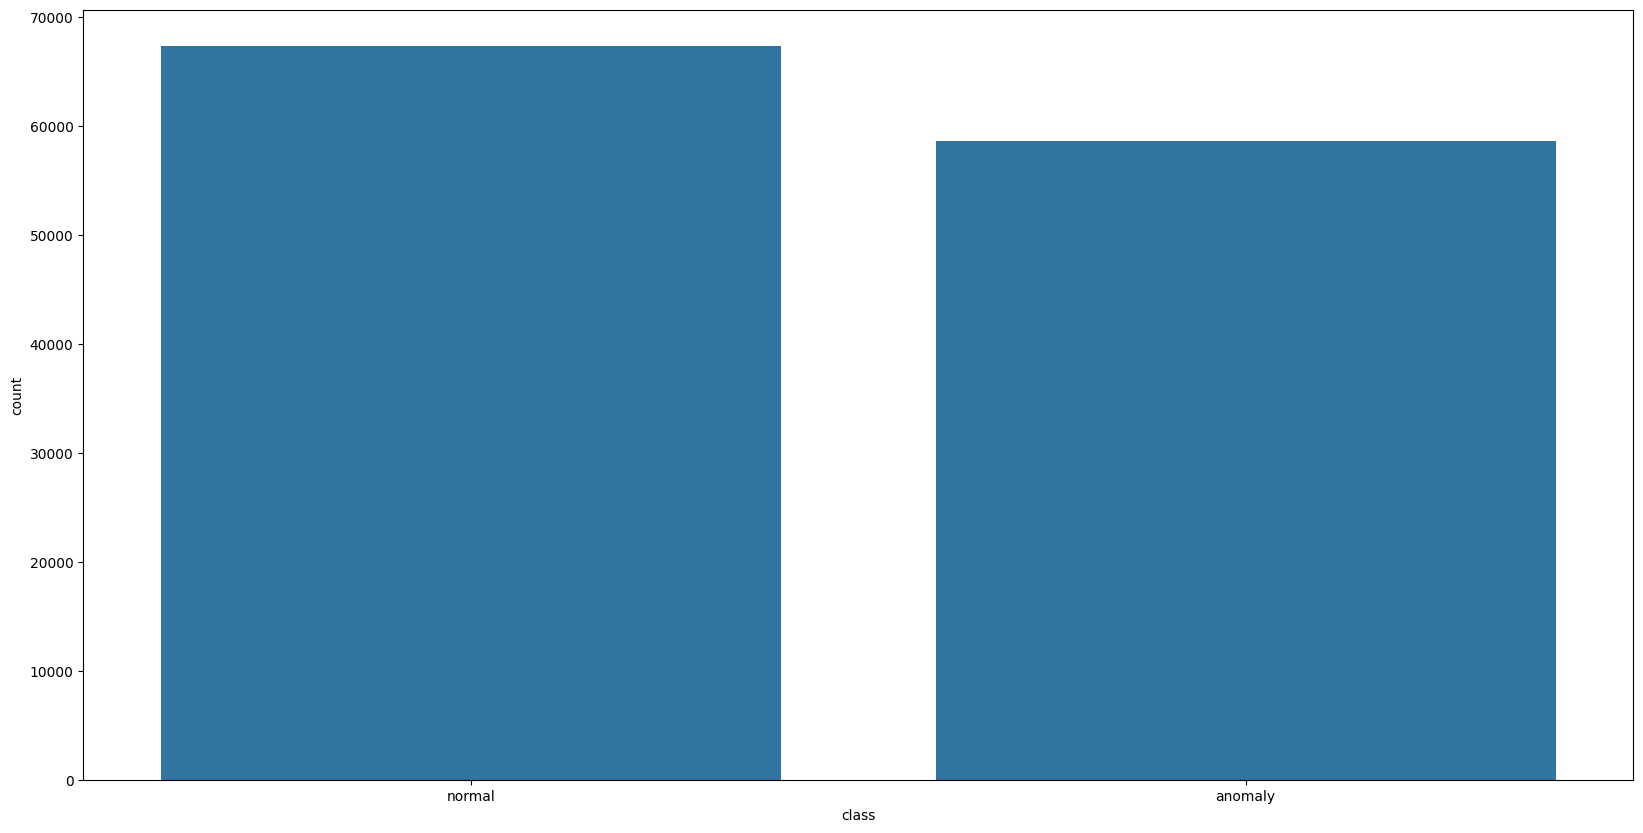

In [8]:
plt.figure(figsize=(20, 10))
sns.countplot(x=train_df['class'])

<h1>Convertir les valeurs chaines de caractère en numeric </h1>

convertir les features land, logged_in, is_host_login et is_guest_login de chaine de caractère a numerique

In [689]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [690]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  float64
 5   dst_bytes                    22544 non-null  float64
 6   land                         22544 non-null  object 
 7   wrong_fragment               22544 non-null  float64
 8   urgent                       22544 non-null  float64
 9   hot                          22544 non-null  float64
 10  num_failed_logins            22544 non-null  float64
 11  logged_in                    22544 non-null  object 
 12  num_compromised              22544 non-null  float64
 13  root_shell      

In [12]:
#convertier les chaine en numeric
train_df["land"] = pd.to_numeric(train_df["land"])
train_df["logged_in"] = pd.to_numeric(train_df["logged_in"])
train_df["is_host_login"] = pd.to_numeric(train_df["is_host_login"])
train_df["is_guest_login"] = pd.to_numeric(train_df["is_guest_login"])

test_df["land"] = pd.to_numeric(test_df["land"])
test_df["logged_in"] = pd.to_numeric(test_df["logged_in"])
test_df["is_host_login"] = pd.to_numeric(test_df["is_host_login"])
test_df["is_guest_login"] = pd.to_numeric(test_df["is_guest_login"])

train_df.select_dtypes([object])


,protocol_type,service,flag,class
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,anomaly
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,anomaly
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,anomaly


In [13]:
train_df=train_df.drop("flag",axis=1)
train_df=train_df.drop("service",axis=1)

In [14]:
test_df=test_df.drop("flag",axis=1)
test_df=test_df.drop("service",axis=1)

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

Suppression des colonnes "flag" et "service" dans les ensembles de données d'apprentissage (train_df) et de test (test_df), <br>
suivie de la suppression des lignes où la colonne "protocol_type" n'est pas égale à 'tcp'.
</div>

In [15]:
test_df["protocol_type"].unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [16]:
train_df = train_df.drop(train_df[train_df.protocol_type != 'tcp'].index)

In [17]:
test_df = test_df.drop(train_df[train_df.protocol_type != 'tcp'].index)

In [697]:
train_df.shape

(102689, 40)

In [698]:
test_df.shape

(22544, 40)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102689 entries, 0 to 125972
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     102689 non-null  float64
 1   protocol_type                102689 non-null  object 
 2   src_bytes                    102689 non-null  float64
 3   dst_bytes                    102689 non-null  float64
 4   land                         102689 non-null  int64  
 5   wrong_fragment               102689 non-null  float64
 6   urgent                       102689 non-null  float64
 7   hot                          102689 non-null  float64
 8   num_failed_logins            102689 non-null  float64
 9   logged_in                    102689 non-null  int64  
 10  num_compromised              102689 non-null  float64
 11  root_shell                   102689 non-null  float64
 12  su_attempted                 102689 non-null  float64
 13  num_

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   protocol_type                22544 non-null  object 
 2   src_bytes                    22544 non-null  float64
 3   dst_bytes                    22544 non-null  float64
 4   land                         22544 non-null  int64  
 5   wrong_fragment               22544 non-null  float64
 6   urgent                       22544 non-null  float64
 7   hot                          22544 non-null  float64
 8   num_failed_logins            22544 non-null  float64
 9   logged_in                    22544 non-null  int64  
 10  num_compromised              22544 non-null  float64
 11  root_shell                   22544 non-null  float64
 12  su_attempted                 22544 non-null  float64
 13  num_root        

In [20]:
train_df=train_df.drop("dst_host_srv_rerror_rate",axis=1)
train_df=train_df.drop("dst_host_rerror_rate",axis=1)
train_df=train_df.drop("dst_host_srv_serror_rate",axis=1)
train_df=train_df.drop("dst_host_serror_rate",axis=1)
train_df=train_df.drop("dst_host_srv_diff_host_rate",axis=1)
train_df=train_df.drop("dst_host_same_src_port_rate",axis=1)
train_df=train_df.drop("dst_host_diff_srv_rate",axis=1)
train_df=train_df.drop("dst_host_same_srv_rate",axis=1)
train_df=train_df.drop("dst_host_srv_count",axis=1)
train_df=train_df.drop("dst_host_count",axis=1)
train_df=train_df.drop("srv_diff_host_rate",axis=1)
train_df=train_df.drop("diff_srv_rate",axis=1)
train_df=train_df.drop("same_srv_rate",axis=1)
train_df=train_df.drop("srv_rerror_rate",axis=1)
train_df=train_df.drop("srv_count",axis=1)
train_df=train_df.drop("srv_serror_rate",axis=1)

In [21]:
test_df=test_df.drop("dst_host_srv_rerror_rate",axis=1)
test_df=test_df.drop("dst_host_rerror_rate",axis=1)
test_df=test_df.drop("dst_host_srv_serror_rate",axis=1)
test_df=test_df.drop("dst_host_serror_rate",axis=1)
test_df=test_df.drop("dst_host_srv_diff_host_rate",axis=1)
test_df=test_df.drop("dst_host_same_src_port_rate",axis=1)
test_df=test_df.drop("dst_host_diff_srv_rate",axis=1)
test_df=test_df.drop("dst_host_same_srv_rate",axis=1)
test_df=test_df.drop("dst_host_srv_count",axis=1)
test_df=test_df.drop("dst_host_count",axis=1)
test_df=test_df.drop("srv_diff_host_rate",axis=1)
test_df=test_df.drop("diff_srv_rate",axis=1)
test_df=test_df.drop("same_srv_rate",axis=1)
test_df=test_df.drop("srv_rerror_rate",axis=1)
test_df=test_df.drop("srv_count",axis=1)
test_df=test_df.drop("srv_serror_rate",axis=1)

In [703]:
# y_true_test = test_df['class']

In [92]:
# y_true_test.head()

In [93]:
# test_df=test_df.drop("class",axis=1)
# train_df=train_df.drop("class",axis=1)

In [22]:
train_df.nunique()

duration              1796
protocol_type            1
src_bytes             3326
dst_bytes             9282
land                     2
wrong_fragment           1
urgent                   4
hot                     28
num_failed_logins        6
logged_in                2
num_compromised         88
root_shell               2
su_attempted             3
num_root                82
num_file_creations      35
num_shells               3
num_access_files        10
num_outbound_cmds        1
is_host_login            2
is_guest_login           2
count                  512
serror_rate             81
rerror_rate             82
class                    2
dtype: int64

In [23]:
test_df.nunique()

duration               624
protocol_type            3
src_bytes             1149
dst_bytes             3650
land                     2
wrong_fragment           3
urgent                   4
hot                     16
num_failed_logins        5
logged_in                2
num_compromised         23
root_shell               2
su_attempted             3
num_root                20
num_file_creations       9
num_shells               4
num_access_files         5
num_outbound_cmds        1
is_host_login            2
is_guest_login           2
count                  495
serror_rate             88
rerror_rate             90
class                    2
dtype: int64

<h1>Supprimer les colonnes qui n'ont pas de valeurs ajoutée </h1>

In [24]:
#for train data
train_df=train_df.drop("protocol_type",axis=1)
train_df=train_df.drop("wrong_fragment",axis=1)
train_df=train_df.drop("num_outbound_cmds",axis=1)


#for test data
test_df=test_df.drop("protocol_type",axis=1)
test_df=test_df.drop("wrong_fragment",axis=1)
test_df=test_df.drop("num_outbound_cmds",axis=1)

In [25]:
train_df.duplicated().sum()

53079

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

Il y a 53,079 lignes dupliquées dans l'ensemble d'apprentissage (train_df).
</div>

In [26]:
train_df=train_df.drop_duplicates(keep='first')
train_df.shape


(49610, 21)

In [27]:
test_df=test_df.drop_duplicates(keep='first')
test_df.shape


(12300, 21)

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

Suppression des lignes dupliquées dans les ensembles d'apprentissage (train_df) et de test (test_df) en conservant la première occurrence de chaque ensemble de valeurs dupliquées. Après cette opération, les formes mises à jour sont respectivement (49610, 21) pour l'ensemble d'apprentissage et (12300, 21) pour l'ensemble de test.

</div>

In [28]:
labelencoder = LabelEncoder()
test_df['class'] = labelencoder.fit_transform(test_df['class'])

In [29]:
test_df['class']

0        0
1        0
2        1
3        0
4        0
        ..
22533    1
22535    1
22538    0
22539    1
22540    1
Name: class, Length: 12300, dtype: int32

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
La colonne 'class' de l'ensemble de test (test_df) a été encodée numériquement à l'aide de LabelEncoder, où les valeurs d'origine ont été converties en 0 et 1.
</div>

In [30]:
y_true_test = test_df['class']

In [31]:
test_df=test_df.drop("class",axis=1)
train_df=train_df.drop("class",axis=1)

In [32]:
y_true_test.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int32

In [33]:
train_df.shape


(49610, 20)

<h2>Normalization</h2>

In [34]:
def normalizing(data):
    for idx in range(len(data.columns)):
        if data.nunique()[idx] != 2:
            data.iloc[:,idx] = normalize([np.array(data.iloc[:,idx])]).reshape(-1)
    return data

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

La fonction normalizing normalise les colonnes de l'ensemble de données data en utilisant la fonction normalize sur chaque colonne qui a plus de deux valeurs uniques. La normalisation est appliquée individuellement à chaque colonne non binaire.
</div>

In [35]:
def PCA_transformation(data, dim = None):
    pca = PCA()
    pca.fit(data)
    cum_vars = np.cumsum(pca.explained_variance_ratio_)
    for i in range(len(cum_vars)):
        if cum_vars[i] == 0.999:
            break
    if dim:
        pca = PCA(dim)
        data = pca.fit_transform(data)
        return pd.DataFrame(data)
    
    pca = PCA(i)
    data = pca.fit_transform(data)
    return pd.DataFrame(data) , i


In [36]:
def GMM_Row_Transform(data, values, threshold):
    probs = []
    for idx in range(len(data.columns)):
        mean = np.array(data.iloc[:,idx]).mean()
        std = np.array(data.iloc[:,idx]).std()

        z_score = (values[idx] - mean)/std
        prob = (1-norm.cdf(z_score))*100
        probs.append(prob)
    return probs


In [37]:
def GMM_Matrix_Transform(origin_data, data, threshold):
    matrix = []
    for i in tqdm(range(len(data))):
        row = GMM_Row_Transform(origin_data, data.iloc[i,:], threshold)
        
        matrix.append(row)
    return matrix

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

Les fonctions GMM_Row_Transform et GMM_Matrix_Transform utilisent la distribution normale cumulative pour calculer les probabilités basées sur les valeurs z-score, indiquant la certitude qu'une valeur dépasse un seuil. La première fonction s'applique à une seule ligne, tandis que la deuxième fonction traite l'ensemble de données complet.


</div>

## d_raw: The originalNSL dataset without any transformation of the numerical values

In [38]:
d_raw_train = train_df
d_raw_train.head()

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,serror_rate,rerror_rate
0,0.0,491.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,0.0,0.0
2,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,123.0,1.0,0.0
3,0.0,232.0,8153.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,0.2,0.0
4,0.0,199.0,420.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,30.0,0.0,0.0
5,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,121.0,0.0,1.0


In [39]:
d_raw_test = test_df
d_raw_test.head()

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,serror_rate,rerror_rate
0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,229.0,0.0,1.0
1,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,136.0,0.0,1.0
2,2.0,12983.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0.0
3,0.0,20.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0.0
4,1.0,0.0,15.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,1.0


## Les données d'apprentissage (d_raw_train) sont attribuées à la variable train_df, et les données de test (d_raw_test) sont attribuées à la variable test_df.


## d_raw_probs: The originalNSL dataset with GMM

In [40]:
d_raw_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_raw_train, d_raw_train, 50))
d_raw_probs_test =  pd.DataFrame(GMM_Matrix_Transform(d_raw_test, d_raw_test, 50))

  0%|                                                                                        | 0/49610 [00:00<?, ?it/s]C:\Users\Wahch\AppData\Local\Temp\ipykernel_12080\4090357052.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_score = (values[idx] - mean)/std
100%|███████████████████████████████████████████████████████████████████████████| 12300/12300 [01:22<00:00, 148.89it/s]


## Les données d'apprentissage d_raw_probs_train et d_raw_probs_test sont créées à partir de l'ensemble de données original NSL (d_raw_train et d_raw_test) en utilisant la fonction GMM_Matrix_Transform. Cette fonction applique une transformation basée sur la distribution normale cumulative (GMM) avec un seuil de 50, générant ainsi des probabilités pour chaque valeur dans l'ensemble de données.


## d_raw_pca: The originalNSL dataset with PCA

In [41]:
d_raw_pca_train = PCA_transformation(d_raw_train , 4)
d_raw_pca_test = PCA_transformation(d_raw_test , 4)

In [42]:
d_raw_pca_train.head()

,0,1,2,3
0,-103787.268303,-49919.572480,-577.286942,-18.741117
1,-104278.268295,-49919.474158,-577.353779,102.250441
2,-104044.635643,-41766.520780,-577.462185,-15.743917
3,-104079.184191,-49499.514015,-577.306236,9.254087
4,-104278.268295,-49919.474158,-577.352391,100.252405


In [43]:
d_raw_pca_test.head()

,0,1,2,3
0,-12637.294053,-3472.268200,-303.115512,166.821621
1,-12637.293904,-3472.246756,-302.613810,73.823282
2,345.669508,-3503.123222,-299.793979,-61.150153
3,-12617.293744,-3472.263254,-301.885397,-61.175117
4,-12637.257962,-3457.210914,-300.959656,-61.165853


## Les données d'apprentissage  d_raw_pca_train et d_raw_pca_test sont créées à partir de l'ensemble de données original NSL (d_raw_train et d_raw_test) en utilisant la fonction PCA_transformation. Cette fonction effectue une transformation PCA en réduisant les données à 4 dimensions spécifiées. Ainsi, d_raw_pca_train et d_raw_pca_test représentent les ensembles de données originaux NSL après avoir subi une transformation PCA vers 4 dimensions.

# # d_raw_pca_probs: The originalNSL dataset with PCA and GMM

In [44]:
d_raw_pca_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_raw_pca_train, d_raw_train, 50))
d_raw_pca_probs_test =  pd.DataFrame(GMM_Matrix_Transform(d_raw_pca_test, d_raw_test, 50))

  0%|                                                                                        | 0/49610 [00:00<?, ?it/s]C:\Users\Wahch\AppData\Local\Temp\ipykernel_12080\4090357052.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_score = (values[idx] - mean)/std
100%|███████████████████████████████████████████████████████████████████████████| 12300/12300 [00:19<00:00, 639.68it/s]


## Les données d'apprentissage d_raw_pca_probs_train et d_raw_pca_probs_test sont créées en appliquant une transformation GMM à l'ensemble de données original NSL qui a préalablement subi une réduction de dimension par PCA vers 4 dimensions. La fonction GMM_Matrix_Transform est utilisée avec un seuil de 50 pour générer des probabilités associées à chaque valeur dans ces ensembles de données transformés par PCA.


# # d_norm: The Normalised dataset 

In [54]:
# d_norm_train = normalizing(train_df)
# d_norm_test = normalizing(test_df)

In [53]:
d_norm_train.head()

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,serror_rate,rerror_rate
0,0.0,2.356812e-07,0.000000e+00,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000134,0.000000,0.000000
2,0.0,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.008237,0.030238,0.000000
3,0.0,1.113606e-07,5.712315e-06,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000335,0.006048,0.000000
4,0.0,9.552048e-08,2.942686e-07,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.002009,0.000000,0.000000
5,0.0,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.008103,0.000000,0.017727


## Les ensembles de données normalisés, d_norm_train et d_norm_test, sont créés à partir des ensembles d'apprentissage (train_df) et de test (test_df) respectivement, en appliquant la fonction de normalisation aux colonnes non binaires.


# # d_norm_probs : The Normalised dataset with GMM 

In [47]:
d_norm_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_norm_train, d_norm_train, 50))
d_norm_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_norm_test, d_norm_test, 50))

  0%|                                                                                        | 0/49610 [00:00<?, ?it/s]C:\Users\Wahch\AppData\Local\Temp\ipykernel_12080\4090357052.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_score = (values[idx] - mean)/std
100%|███████████████████████████████████████████████████████████████████████████| 12300/12300 [01:27<00:00, 140.56it/s]


## Les datasets d_norm_probs_train et d_norm_probs_test sont obtenues en appliquant une transformation GMM à l'ensemble de données normalisé, à savoir d_norm_train et d_norm_test. La fonction GMM_Matrix_Transform est utilisée avec un seuil de 50 pour générer des probabilités associées à chaque valeur dans ces ensembles de données normalisés.


# # d_norm_pca : The Normalised dataset with PCA

In [49]:
d_norm_pca_train = PCA_transformation(d_norm_train , 4)
d_norm_pca_test = PCA_transformation(d_norm_test , 4)

## Les ensembles de données normalisés et réduits en dimension par PCA, d_norm_pca_train et d_norm_pca_test, sont obtenus en appliquant la fonction PCA_transformation aux ensembles d'apprentissage (d_norm_train) et de test (d_norm_test), respectivement, avec une réduction à 4 dimensions.


# # d_norm_pca_probs : The Normalised dataset with PCA & GMM

In [50]:
d_norm_pca_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_norm_pca_train ,  d_norm_pca_train , 50))
d_norm_pca_probs_test =  pd.DataFrame(GMM_Matrix_Transform(d_norm_pca_test , d_norm_pca_test , 50))

100%|███████████████████████████████████████████████████████████████████████████| 12300/12300 [00:16<00:00, 742.55it/s]


## Les datasets d_norm_pca_probs_train et d_norm_pca_probs_test sont créées en appliquant une transformation GMM à l'ensemble de données normalisé et réduit en dimension par PCA, c'est-à-dire d_norm_pca_train et d_norm_pca_test. La fonction GMM_Matrix_Transform est utilisée avec un seuil de 50 pour générer des probabilités associées à chaque valeur dans ces ensembles de données.


## Modeling

In [132]:
def GMM_vote(data, values, threshold):
    no = 0
    for idx in range(len(data.columns)):
        mean = np.array(data.iloc[:,idx]).mean()
        std = np.array(data.iloc[:,idx]).std()

        z_score = (values[idx] - mean)/std
        prob = (1-norm.cdf(z_score))*100
        if prob <= threshold:
            no += 1  
    return no


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

La fonction GMM_vote évalue le nombre de valeurs dans un ensemble de données
dépassant un seuil de probabilité, calculé à partir du modèle de mélange gaussien,
en se basant sur les scores Z des valeurs par rapport à la moyenne et l'écart type de
chaque colonne.
</div>

In [133]:
def voting(data_train, data_test, min_abnormal_features = 10, threshold = 50):
    preds = []
    for idx in tqdm(range(len(data_test))):
        values = list(data_test.iloc[idx,:])
        no = GMM_vote(data_train, values, threshold)
        if no > min_abnormal_features:
            preds.append(1)
        else:
            preds.append(0)
    return preds

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

La fonction voting effectue une classification binaire des observations de l'ensemble
de test en se basant sur le nombre de caractéristiques anormales dépassant un seuil
donné, en utilisant la fonction GMM_vote appliquée aux données d'entraînement.
</div>

In [134]:
def K_means_Distance(test_idx, test_data, model):
    c1 = np.array(test_data.iloc[test_idx,:])
    c2 = model.cluster_centers_[0]
    temp = c1 - c2
    euclid_dist = np.sqrt(np.dot(temp.T, temp))
    euclid_dist
    return euclid_dist

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

La fonction K_means_Distance mesure la distance euclidienne entre un point
spécifique de l'ensemble de test et le centre du premier cluster déterminé par un
modèle de k-moyennes.

</div>

In [135]:
def kmd_model(test_data, train_data, model, threshold_dis):
    kmd_d_raw_preds  = [] 
    for idx in tqdm(range(len(test_data))):
        dis = K_means_Distance(idx, test_data, model)
        if dis > threshold_dis:
            kmd_d_raw_preds.append(1)
        else:
            kmd_d_raw_preds.append(0)
    return kmd_d_raw_preds


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

La fonction kmd_model génère des prédictions binaires (1 pour anomalie, 0 pour
normal) sur l'ensemble de test en utilisant un modèle de k-moyennes, en se basant
sur la distance euclidienne entre chaque point de test et le centre du premier cluster,
avec un seuil de distance définis.

</div>

In [198]:
def SVM_model(train_data, train_target, test_data):
    model = SVC()
    model.fit(train_data, train_target)
    preds = model.predict(test_data)
    return preds


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

La fonction SVM_model entraîne un modèle de Support Vector Machine (SVM) sur des
données d'entraînement et génère des prédictions sur un ensemble de test.is.

</div>

In [137]:
def dt_model(train_data, test_data):
    model = tree.DecisionTreeClassifier()
    model.fit(train_data, train_target)
    preds = model.predict(test_data)
    return preds


In [138]:
def kmean_C_model(train_data, test_data):
    kmeans = KMeans(n_clusters=2, n_init="auto").fit(train_data)
    preds = kmeans.predict(test_data)
    return preds


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">

La fonction kmean_C_model applique un modèle de k-moyennes avec deux clusters à
des données d'entraînement, puis génère des prédictions sur un ensemble de test en
attribuant chaque point au cluster le plus proche..

</div>

In [139]:
def mlp_model(train_data, test_data):
    model = MLPClassifier(max_iter=300).fit(train_data, train_target)
    preds = model.predict(test_data)
    return preds

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
La fonction mlp_model met en œuvre un modèle de classification basé sur un perceptron multicouche (MLP), formé sur les données d'entraînement avec les étiquettes associées, pour prédire les étiquettes des données de test.</div>


In [288]:
def sensitivity(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    sensitivity_score = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    print(f'True Positives (tp): {tp}')
    print(f'False Negatives (fn): {fn}')
    print(f'Sensitivity Score: {sensitivity_score}')

    return sensitivity_score

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
La fonction sensitivity calcule et retourne le score de sensibilité, mesurant la
capacité d'un modèle à détecter correctement les occurrences positives, en se
basant sur les prédictions binaires comparées aux valeurs réelles.</div>


In [142]:
def f1(y_true, y_pred):
    return f1_score(y_true, y_pred)


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
La fonction f1 utilise la métrique F1-score pour évaluer la performance d'un modèle en
comparant les prédictions binaires (y_pred) aux vraies valeurs (y_true).</div>


In [171]:
def cap(y_true, y_pred):
    y_true_binaire = (y_true > 0.5).astype(int)
    fpr, tpr, _ = roc_curve(y_true_binaire, y_pred)
    return roc_auc_score(y_true_binaire, y_pred)


def auc(x, y):
    return roc_auc_score(x, y)


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
La fonction cap calcule l'Aire Sous la Courbe ROC (AUC) en utilisant les vraies valeurs
et les prédictions continues, tandis que la fonction auc mesure l'AUC entre deux
ensembles de données.</div>


## VOTING

In [144]:
y_raw_probs_voting = voting(d_raw_probs_train, d_raw_probs_test, min_abnormal_features = 10, threshold = 50)


100%|███████████████████████████████████████████████████████████████████████████| 12300/12300 [01:34<00:00, 129.83it/s]


In [265]:
y_raw_probs_votingF1=f1(y_true_test, y_raw_probs_voting)
y_raw_probs_votingF1

0.8317372150928941

In [266]:
y_raw_probs_votingcap=cap(y_true_test, y_raw_probs_voting)
y_raw_probs_votingcap

0.5137012326710423

In [292]:
y_raw_probs_votingsensivity=sensitivity(y_true_test, y_raw_probs_voting)
y_raw_probs_votingsensivity

True Positives (tp): 8685
False Negatives (fn): 5
Sensitivity Score: 0.9994246260069045


0.9994246260069045

In [274]:
y_raw_pca_probs_voting = voting(d_raw_pca_probs_train, d_raw_pca_probs_test, min_abnormal_features = 10, threshold = 50)

100%|███████████████████████████████████████████████████████████████████████████| 12300/12300 [00:18<00:00, 671.53it/s]


In [275]:
y_raw_pca_probs_votingF1=f1(y_true_test,y_raw_pca_probs_voting )
y_raw_pca_probs_votingF1

0.0

In [276]:
y_raw_pca_probs_votingcap=cap(y_true_test, y_raw_pca_probs_voting)
y_raw_pca_probs_votingcap

0.5

In [290]:
y_raw_pca_probs_votingsensitivity=sensitivity(y_true_test, y_raw_pca_probs_voting)
y_raw_pca_probs_votingsensitivity

True Positives (tp): 0
False Negatives (fn): 8690
Sensitivity Score: 0.0


0.0

In [146]:
y_norm_probs_voting = voting(d_norm_probs_train, d_norm_probs_test, min_abnormal_features = 10, threshold = 50)

100%|███████████████████████████████████████████████████████████████████████████| 12300/12300 [01:32<00:00, 133.52it/s]


In [282]:
y_norm_probs_votingF1=f1(y_true_test,y_norm_probs_voting )
y_norm_probs_votingF1

0.8317372150928941

In [519]:
y_norm_probs_votingcap=cap(y_true_test,y_norm_probs_voting )
y_norm_probs_votingcap

0.5137012326710423

In [289]:
y_norm_probs_votingsensitivity=sensitivity(y_true_test,y_norm_probs_voting )
y_norm_probs_votingsensitivity

True Positives (tp): 8685
False Negatives (fn): 5
Sensitivity Score: 0.9994246260069045


0.9994246260069045

In [147]:
y_norm_pca_probs_voting = voting(d_norm_pca_probs_train, d_norm_pca_probs_test , min_abnormal_features = 10, threshold = 50)

100%|███████████████████████████████████████████████████████████████████████████| 12300/12300 [00:19<00:00, 633.36it/s]


In [505]:
y_norm_pca_probs_voting_sensitivity = sensitivity(y_true_test,y_norm_pca_probs_voting )
y_norm_pca_probs_voting_sensitivity

True Positives (tp): 0
False Negatives (fn): 8690
Sensitivity Score: 0.0


0.0

In [504]:
y_norm_pca_probs_voting_f1 = f1(y_true_test, y_raw_probs_voting)
y_norm_pca_probs_voting_f1

0.8317372150928941

In [520]:
y_norm_pca_probs_voting_cap = cap(y_true_test, y_raw_probs_voting)
y_norm_pca_probs_voting_cap

0.5137012326710423

## KM-D

In [174]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(d_raw_train)
y_raw_kmd = kmd_model(d_raw_test, d_raw_train, kmeans_model, 10)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|█████████████████████████████████████████████████████████████████████████| 12300/12300 [00:00<00:00, 12826.97it/s]


In [524]:
y_raw_kmd_sensitivity = sensitivity(y_true_test, y_raw_kmd)
y_raw_kmd_sensitivity

True Positives (tp): 0
False Negatives (fn): 8690
Sensitivity Score: 0.0


0.0

In [527]:
y_raw_kmd_f1 = f1(y_true_test, y_raw_kmd)
y_raw_kmd_f1

0.0

In [528]:
y_raw_kmd_cap = cap(y_true_test,y_raw_kmd)
y_raw_kmd_cap

0.5

In [294]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(d_raw_probs_train)
y_raw_probs_kmd = kmd_model(d_raw_probs_test, d_raw_probs_train, kmeans_model, 10)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|█████████████████████████████████████████████████████████████████████████| 12300/12300 [00:00<00:00, 18841.81it/s]


In [529]:
y_raw_probs_kmd_sensitivity = sensitivity(y_true_test, y_raw_probs_kmd)
y_raw_probs_kmd_sensitivity

True Positives (tp): 8690
False Negatives (fn): 0
Sensitivity Score: 1.0


1.0

In [532]:
y_raw_probs_kmd_f1 = f1(y_true_test, y_raw_probs_kmd)
y_raw_probs_kmd_f1

0.8280133396855646

In [531]:
y_raw_probs_kmd_cap = cap(y_true_test,y_raw_probs_kmd)
y_raw_probs_kmd_cap

0.5

In [298]:
kmeans_model1 = KMeans(n_clusters=2)
kmeans_model1.fit(d_raw_pca_train)
y_raw_pca_kmd = kmd_model(d_raw_pca_test, d_raw_pca_train, kmeans_model1, 10)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|█████████████████████████████████████████████████████████████████████████| 12300/12300 [00:00<00:00, 18609.55it/s]


In [501]:
y_raw_pca_kmd_sensitivity = sensitivity(y_true_test, y_raw_pca_kmd)
y_raw_pca_kmd_sensitivity

True Positives (tp): 8690
False Negatives (fn): 0
Sensitivity Score: 1.0


1.0

In [500]:
y_raw_pca_kmd_f1 = f1(y_true_test, y_raw_pca_kmd)
y_raw_pca_kmd_f1

0.8280133396855646

In [499]:
y_raw_pca_kmd_cap = cap(y_true_test,y_raw_pca_kmd)
y_raw_pca_kmd_cap

0.5

In [302]:
kmeans_model2 = KMeans(n_clusters=2)
kmeans_model2.fit(d_raw_pca_train)
y__raw_pca_probs_kmd = kmd_model(d_raw_pca_probs_test, d_raw_pca_probs_train, kmeans_model2, 10)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|█████████████████████████████████████████████████████████████████████████| 12300/12300 [00:00<00:00, 18658.77it/s]


In [495]:
y__raw_pca_probs_kmd_sensitivity = sensitivity(y_true_test, y__raw_pca_probs_kmd)
y__raw_pca_probs_kmd_sensitivity

True Positives (tp): 8690
False Negatives (fn): 0
Sensitivity Score: 1.0


1.0

In [496]:
y__raw_pca_probs_kmd_f1 = f1(y_true_test, y__raw_pca_probs_kmd)
y__raw_pca_probs_kmd_f1

0.8280133396855646

In [497]:
y__raw_pca_probs_kmd_cap = cap(y_true_test,y__raw_pca_probs_kmd)
y__raw_pca_probs_kmd_cap

0.5

In [306]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(d_norm_train)
y_norm_kmd = kmd_model(d_norm_test, d_norm_train, kmeans_model, 10)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|█████████████████████████████████████████████████████████████████████████| 12300/12300 [00:01<00:00, 12161.22it/s]


In [596]:
y_norm_kmd_sensitivity = sensitivity(y_true_test, y_norm_kmd)
y_norm_kmd_sensitivity

True Positives (tp): 8690
False Negatives (fn): 0
Sensitivity Score: 1.0


1.0

In [595]:
y_norm_kmd_f1 = f1(y_true_test, y_norm_kmd)
y_norm_kmd_f1

0.8280133396855646

In [494]:
y_norm_kmd_cap = cap(y_true_test,y_norm_kmd)
y_norm_kmd_cap

0.5

In [319]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(d_norm_probs_train)
y_norm_probs_kmd = kmd_model(d_norm_probs_test, d_norm_probs_train, kmeans_model, 10)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|█████████████████████████████████████████████████████████████████████████| 12300/12300 [00:00<00:00, 18392.58it/s]


In [597]:
y_norm_probs_kmd_sensitivity = sensitivity(y_true_test, y_norm_probs_kmd)
y_norm_probs_kmd_sensitivity  

True Positives (tp): 8690
False Negatives (fn): 0
Sensitivity Score: 1.0


1.0

In [598]:
y_norm_probs_kmd_f1 = f1(y_true_test, y_norm_probs_kmd)
y_norm_probs_kmd_f1

0.8280133396855646

In [493]:
y_norm_probs_kmd_cap = cap(y_true_test,y_norm_probs_kmd)
y_norm_probs_kmd_cap

0.5

In [310]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(d_norm_pca_train)
y_norm_pca_kmd = kmd_model(d_norm_pca_test, d_norm_pca_train, kmeans_model, 10)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|█████████████████████████████████████████████████████████████████████████| 12300/12300 [00:00<00:00, 18465.93it/s]


In [599]:
y_norm_pca_kmd_sensitivity = sensitivity(y_true_test, y_norm_pca_kmd)
y_norm_pca_kmd_sensitivity

True Positives (tp): 0
False Negatives (fn): 8690
Sensitivity Score: 0.0


0.0

In [600]:
y_norm_pca_kmd_f1 = f1(y_true_test, y_norm_pca_kmd)
y_norm_pca_kmd_f1

0.0

In [492]:
y_norm_pca_kmd_cap = cap(y_true_test,y_norm_pca_kmd)
y_norm_pca_kmd_cap

0.5

In [323]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(d_norm_pca_probs_train)
y_norm_pca_probs_kmd = kmd_model(d_norm_pca_probs_test, d_norm_pca_probs_train, kmeans_model, 10)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|█████████████████████████████████████████████████████████████████████████| 12300/12300 [00:00<00:00, 17970.42it/s]


In [601]:
y_norm_pca_probs_kmd_sensitivity = sensitivity(y_true_test, y_norm_pca_probs_kmd)
y_norm_pca_probs_kmd_sensitivity

True Positives (tp): 7214
False Negatives (fn): 1476
Sensitivity Score: 0.8301495972382048


0.8301495972382048

In [490]:
y_norm_pca_probs_kmd_cap = cap(y_true_test,y_norm_pca_probs_kmd)
y_norm_pca_probs_kmd_cap 

0.7955457127465262

In [491]:
y_norm_pca_probs_kmd_f1 = f1(y_true_test, y_norm_pca_probs_kmd)
y_norm_pca_probs_kmd_f1 

0.8604997912566351

## SVM-1

In [199]:
y_raw_svm1 = SVM_model(d_raw_train, train_target ,  d_raw_test)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [602]:
y_raw_svm1_sensitivity = sensitivity(y_true_test, y_raw_svm1)
y_raw_svm1_sensitivity

True Positives (tp): 7214
False Negatives (fn): 1476
Sensitivity Score: 0.8301495972382048


0.8301495972382048

In [542]:
y_raw_svm1_cap = cap(y_true_test,y_raw_svm1)
y_raw_svm1_cap

0.7955457127465262

In [543]:
y_raw_svm1_f1 = f1(y_true_test, y_raw_svm1)
y_raw_svm1_f1

0.8604997912566351

In [203]:
y_raw_probs_SVM1=SVM_model(d_raw_probs_train,train_target,d_raw_probs_test)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [544]:
y_raw_probs_SVM1_sensitivity = sensitivity(y_true_test, y_raw_probs_SVM1)
y_raw_probs_SVM1_sensitivity

True Positives (tp): 8655
False Negatives (fn): 35
Sensitivity Score: 0.9959723820483314


0.9959723820483314

In [546]:
y_raw_probs_SVM1_cap = cap(y_true_test,y_raw_probs_SVM1)
y_raw_probs_SVM1_cap

0.6914764957333068

In [547]:
y_raw_probs_SVM1_f1 = f1(y_true_test, y_raw_probs_SVM1)
y_raw_probs_SVM1_f1

0.8850598220676962

In [204]:
y_raw_pca_SVM1=SVM_model(d_raw_pca_train,train_target,d_raw_pca_test)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [548]:
y_raw_pca_SVM1_sensitivity = sensitivity(y_true_test, y_raw_pca_SVM1)
y_raw_pca_SVM1_sensitivity

True Positives (tp): 8687
False Negatives (fn): 3
Sensitivity Score: 0.9996547756041427


0.9996547756041427

In [549]:
y_raw_pca_SVM1_cap = cap(y_true_test,y_raw_pca_SVM1)
y_raw_pca_SVM1_cap

0.49996589195719604

In [550]:
y_raw_pca_SVM1_f1 = f1(y_true_test, y_raw_pca_SVM1)
y_raw_pca_SVM1_f1

0.8278852568378919

In [205]:
y_raw_pca_probsSVM1=SVM_model(d_raw_pca_probs_train,train_target,d_raw_pca_probs_test)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [551]:
y_raw_pca_probsSVM1_sensitivity = sensitivity(y_true_test, y_raw_pca_probsSVM1)
y_raw_pca_probsSVM1_sensitivity

True Positives (tp): 8308
False Negatives (fn): 382
Sensitivity Score: 0.9560414269275028


0.9560414269275028

In [552]:
y_raw_pca_probsSVM1_cap = cap(y_true_test,y_raw_pca_probsSVM1)
y_raw_pca_probsSVM1_cap

0.8530899655413137

In [553]:
y_raw_pca_probsSVM1_f1 = f1(y_true_test, y_raw_pca_probsSVM1)
y_raw_pca_probsSVM1_f1

0.9282681564245808

In [206]:
y_norm_svm1 = SVM_model(d_norm_train, train_target ,  d_norm_test)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [554]:
y_norm_svm1_sensitivity = sensitivity(y_true_test, y_norm_svm1)
y_norm_svm1_sensitivity

True Positives (tp): 7214
False Negatives (fn): 1476
Sensitivity Score: 0.8301495972382048


0.8301495972382048

In [555]:
y_norm_svm1_cap = cap(y_true_test,y_norm_svm1)
y_norm_svm1_cap

0.7955457127465262

In [556]:
y_norm_svm1_f1 = f1(y_true_test, y_norm_svm1)
y_norm_svm1_f1

0.8604997912566351

In [207]:
y_norm_probsSVM1=SVM_model(d_norm_probs_train, train_target ,  d_norm_probs_test)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [557]:
y_norm_probsSVM1_sensitivity = sensitivity(y_true_test, y_norm_probsSVM1)
y_norm_probsSVM1_sensitivity

True Positives (tp): 8655
False Negatives (fn): 35
Sensitivity Score: 0.9959723820483314


0.9959723820483314

In [558]:
y_norm_probsSVM1_cap = cap(y_true_test,y_norm_probsSVM1)
y_norm_probsSVM1_cap

0.6914764957333068

In [559]:
y_norm_probsSVM1_f1 = f1(y_true_test, y_norm_probsSVM1)
y_norm_probsSVM1_f1

0.8850598220676962

In [208]:
y_norm_pca_svm1 = SVM_model(d_norm_pca_train, train_target ,  d_norm_pca_test)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [560]:
y_norm_pca_svm1_sensitivity= sensitivity(y_true_test, y_norm_pca_svm1)
y_norm_pca_svm1_sensitivity

True Positives (tp): 8690
False Negatives (fn): 0
Sensitivity Score: 1.0


1.0

In [561]:
y_norm_pca_svm1_cap = cap(y_true_test,y_norm_pca_svm1)
y_norm_pca_svm1_cap

0.5

In [562]:
y_norm_pca_svm1_f1 = f1(y_true_test, y_norm_pca_svm1)
y_norm_pca_svm1_f1

0.8280133396855646

In [209]:
y_norm_pca_probs_svm1 = SVM_model(d_norm_pca_probs_train, train_target ,  d_norm_pca_probs_test)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [563]:
y_norm_pca_probs_svm1_f1 = f1(y_true_test,y_raw_svm1)
y_norm_pca_probs_svm1_f1

0.8604997912566351

In [564]:
y_norm_pca_probs_svm1_cap = cap(y_true_test,y_raw_svm1)
y_norm_pca_probs_svm1_cap

0.7955457127465262

In [489]:
y_norm_pca_probs_svm1_sensitivity = sensitivity(y_true_test,y_raw_svm1)
y_norm_pca_probs_svm1_sensitivity

True Positives (tp): 7214
False Negatives (fn): 1476
Sensitivity Score: 0.8301495972382048


0.8301495972382048

## KM-C

In [352]:
y_raw_kmc = kmean_C_model(d_raw_train,  d_raw_test)

In [566]:
y_raw_kmc_f1 = f1(y_true_test,y_raw_kmc)
y_raw_kmc_f1

0.2286200758455228

In [567]:
y_raw_kmc_cap = cap(y_true_test,y_raw_kmc)
y_raw_kmc_cap

0.20354229556691072

In [568]:
y_raw_kmc_sensitivity = sensitivity(y_true_test,y_raw_kmc)
y_raw_kmc_sensitivity

True Positives (tp): 1477
False Negatives (fn): 7213
Sensitivity Score: 0.16996547756041427


0.16996547756041427

In [354]:
y_raw_probs_kmc = kmean_C_model(d_raw_probs_train,  d_raw_probs_test)

In [569]:
y_raw_probs_kmc_cap = cap(y_true_test,y_raw_probs_kmc)
y_raw_probs_kmc_cap

0.22191393935143713

In [570]:
y_raw_probs_kmc_f1 = f1(y_true_test,y_raw_probs_kmc)
y_raw_probs_kmc_f1

0.15939625145131864

In [571]:
y_raw_probs_kmc_sensitivity = sensitivity(y_true_test,y_raw_probs_kmc)
y_raw_probs_kmc_sensitivity

True Positives (tp): 961
False Negatives (fn): 7729
Sensitivity Score: 0.11058688147295742


0.11058688147295742

In [358]:
y_raw_pca_kmc = kmean_C_model(d_raw_pca_train,  d_raw_pca_test)

In [441]:
y_raw_pca_kmc_cap = cap(y_true_test,y_raw_pca_kmc)
y_raw_pca_kmc_cap

0.5

In [443]:
y_raw_pca_kmc_f1 = f1(y_true_test,y_raw_pca_kmc)
y_raw_pca_kmc_f1

0.0

In [444]:
y_raw_pca_kmc_sensitivity = sensitivity(y_true_test,y_raw_pca_kmc)
y_raw_pca_kmc_sensitivity

True Positives (tp): 0
False Negatives (fn): 8690
Sensitivity Score: 0.0


0.0

In [363]:
y_raw_pca_probs_kmc = kmean_C_model(d_raw_pca_probs_train,  d_raw_pca_probs_test)

In [445]:
y_raw_pca_probs_kmc_cap = cap(y_true_test,y_raw_pca_probs_kmc)
y_raw_pca_probs_kmc_cap

0.7138639630995605

In [446]:
y_raw_pca_probs_kmc_f1 = f1(y_true_test,y_raw_pca_probs_kmc)
y_raw_pca_probs_kmc_f1

0.6303387334315169

In [487]:
y_raw_pca_probs_kmc_sensitivity = sensitivity(y_true_test,y_raw_pca_probs_kmc)
y_raw_pca_probs_kmc_sensitivity

True Positives (tp): 4066
False Negatives (fn): 4624
Sensitivity Score: 0.4678941311852704


0.4678941311852704

In [375]:
y_norm_kmc = kmean_C_model(d_norm_train,  d_norm_test)

In [486]:
y_norm_kmc_cap = cap(y_true_test,y_norm_kmc)
y_norm_kmc_cap

0.20354229556691072

In [485]:
y_norm_kmc_f1 = f1(y_true_test,y_norm_kmc)
y_norm_kmc_f1

0.2286200758455228

In [484]:
y_norm_kmc_sensitivity = sensitivity(y_true_test,y_norm_kmc)
y_norm_kmc_sensitivity

True Positives (tp): 1477
False Negatives (fn): 7213
Sensitivity Score: 0.16996547756041427


0.16996547756041427

In [483]:
y_norm_probs_kmc = kmean_C_model(d_norm_probs_train,  d_norm_probs_test)

In [481]:
y_norm_probs_kmc_cap = cap(y_true_test,y_norm_probs_kmc)
y_norm_probs_kmc_cap

0.7780860606485629

In [450]:
y_norm_probs_kmc_f1 = f1(y_true_test,y_norm_probs_kmc)
y_norm_probs_kmc_f1

0.8771989558506413

In [451]:
y_norm_probs_kmc_sensitivity = sensitivity(y_true_test,y_norm_probs_kmc)
y_norm_probs_kmc_sensitivity

True Positives (tp): 7729
False Negatives (fn): 961
Sensitivity Score: 0.8894131185270425


0.8894131185270425

In [384]:
y_norm_pca_kmc = kmean_C_model(d_norm_pca_train,  d_norm_pca_test)

In [452]:
y_norm_pca_kmc_cap = cap(y_true_test,y_norm_pca_kmc)
y_norm_pca_kmc_cap

0.20354229556691072

In [453]:
y_norm_pca_kmc_f1 = f1(y_true_test,y_norm_pca_kmc)
y_norm_pca_kmc_f1

0.2286200758455228

In [632]:
y_norm_pca_kmc_sensitivity = sensitivity(y_true_test,y_norm_pca_kmc)
y_norm_pca_kmc_sensitivity

True Positives (tp): 1477
False Negatives (fn): 7213
Sensitivity Score: 0.16996547756041427


0.16996547756041427

In [388]:
y_norm_pca_probs_kmc = kmean_C_model(d_norm_pca_probs_train,  d_norm_pca_probs_test)

In [455]:
y_norm_pca_probs_kmc_cap = cap(y_true_test,y_norm_pca_probs_kmc)
y_norm_pca_probs_kmc_cap

0.20354229556691072

In [457]:
y_norm_pca_probs_kmc_f1 = f1(y_true_test,y_norm_pca_probs_kmc)
y_norm_pca_probs_kmc_f1

0.2286200758455228

In [458]:
y_norm_pca_probs_kmc_sensitivity = sensitivity(y_true_test,y_norm_pca_probs_kmc)
y_norm_pca_probs_kmc_sensitivity

True Positives (tp): 1477
False Negatives (fn): 7213
Sensitivity Score: 0.16996547756041427


0.16996547756041427

## DT

In [392]:
y_raw_dt = dt_model(d_raw_train,  d_raw_test)

In [460]:
y_raw_dt_f1 = f1(y_true_test,y_raw_dt)
y_raw_dt_f1

0.8573461791110137

In [461]:
y_raw_dt_sensitivity = sensitivity(y_true_test,y_raw_dt)
y_raw_dt_sensitivity

True Positives (tp): 7831
False Negatives (fn): 859
Sensitivity Score: 0.901150747986191


0.901150747986191

In [462]:
y_raw_dt_cap = cap(y_true_test,y_raw_dt)
y_raw_dt_cap

0.7086086149903255

In [396]:
y_raw_probs_dt = dt_model(d_raw_probs_train,  d_raw_probs_test)

In [463]:
y_raw_probs_dt_f1 = f1(y_true_test,y_raw_probs_dt)
y_raw_probs_dt_f1

0.8686879703348237

In [464]:
y_raw_probs_dt_sensitivity = sensitivity(y_true_test,y_raw_probs_dt)
y_raw_probs_dt_sensitivity

True Positives (tp): 7965
False Negatives (fn): 725
Sensitivity Score: 0.9165707710011507


0.9165707710011507

In [465]:
y_raw_probs_dt_cap = cap(y_true_test,y_raw_probs_dt)
y_raw_probs_dt_cap

0.725182892425783

In [400]:
y_raw_pca_dt = dt_model(d_raw_pca_train,  d_raw_pca_test)

In [466]:
y_raw_pca_dt_f1 = f1(y_true_test,y_raw_pca_dt)
y_raw_pca_dt_f1

0.8521595598349381

In [578]:
y_raw_pca_dt_sensitivity = sensitivity(y_true_test,y_raw_pca_dt)
y_raw_pca_dt_sensitivity

True Positives (tp): 7744
False Negatives (fn): 946
Sensitivity Score: 0.8911392405063291


0.8911392405063291

In [467]:
y_raw_pca_dt_cap = cap(y_true_test,y_raw_pca_dt)
y_raw_pca_dt_cap

0.7044338861811423

In [228]:
y_raw_pca_probs_dt = dt_model(d_raw_pca_probs_train,  d_raw_pca_probs_test)

In [468]:
y_raw_pca_probs_dt_f1 = f1(y_true_test,y_raw_pca_probs_dt)
y_raw_pca_probs_dt_f1

0.8147310804378868

In [469]:
y_raw_pca_probs_dt_sensitivity = sensitivity(y_true_test,y_raw_pca_probs_dt)
y_raw_pca_probs_dt_sensitivity

True Positives (tp): 6847
False Negatives (fn): 1843
Sensitivity Score: 0.7879171461449942


0.7879171461449942

In [470]:
y_raw_pca_probs_dt_cap = cap(y_true_test,y_raw_pca_probs_dt)
y_raw_pca_probs_dt_cap

0.7179197919090622

In [229]:
y_norm_dt = dt_model(d_norm_train,  d_norm_test)

In [472]:
y_norm_dt_f1 = f1(y_true_test,y_norm_dt)
y_norm_dt_f1

0.8577217962760132

In [473]:
y_norm_dt_sensitivity = sensitivity(y_true_test,y_norm_dt)
y_norm_dt_sensitivity

True Positives (tp): 7831
False Negatives (fn): 859
Sensitivity Score: 0.901150747986191


0.901150747986191

In [474]:
y_norm_dt_cap = cap(y_true_test,y_norm_dt)
y_norm_dt_cap

0.7097166482313226

In [230]:
y_norm_probs_dt = dt_model(d_norm_probs_train,  d_norm_probs_test)

In [475]:
y_norm_probs_dt_f1 = f1(y_true_test,y_norm_probs_dt)
y_norm_probs_dt_f1

0.8680502457673401

In [476]:
y_norm_probs_dt_sensitivity = sensitivity(y_true_test,y_norm_probs_dt)
y_norm_probs_dt_sensitivity

True Positives (tp): 7947
False Negatives (fn): 743
Sensitivity Score: 0.9144994246260069


0.9144994246260069

In [579]:
y_norm_probs_dt_cap = cap(y_true_test,y_norm_probs_dt)
y_norm_probs_dt_cap

0.7255322607894577

In [413]:
y_norm_pca_dt = dt_model(d_norm_pca_train,  d_norm_pca_test)

In [580]:
y_norm_pca_dt_f1 = f1(y_true_test,y_norm_pca_dt)
y_norm_pca_dt_f1

0.8307309129226939

In [477]:
y_norm_pca_dt_sensitivity = sensitivity(y_true_test,y_norm_pca_dt)
y_norm_pca_dt_sensitivity

True Positives (tp): 8672
False Negatives (fn): 18
Sensitivity Score: 0.9979286536248562


0.9979286536248562

In [478]:
y_norm_pca_dt_cap = cap(y_true_test,y_norm_probs_dt)
y_norm_pca_dt_cap

0.7255322607894577

In [232]:
y_norm_pca_probs_dt = dt_model(d_norm_pca_probs_train,  d_norm_pca_probs_test)

In [581]:
y_norm_pca_probs_dt_f1 = f1(y_true_test,y_norm_pca_probs_dt)
y_norm_pca_probs_dt_f1

0.22834584720179577

In [479]:
y_norm_pca_probs_dt_sensitivity = sensitivity(y_true_test,y_norm_pca_probs_dt)
y_norm_pca_probs_dt_sensitivity

True Positives (tp): 1475
False Negatives (fn): 7215
Sensitivity Score: 0.16973532796317606


0.16973532796317606

In [480]:
y_norm_pca_probs_dt_cap = cap(y_true_test,y_norm_pca_probs_dt)
y_norm_pca_probs_dt_cap

0.20342722076829164

## MLP

In [427]:
y_raw_mlp = dt_model(d_raw_train,  d_raw_test)

In [428]:
y_raw_mlp_f1 = f1(y_true_test,y_raw_mlp)
y_raw_mlp_f1

0.8574557800777614

In [250]:
y_raw_mlp_sensitivity = sensitivity(y_true_test,y_raw_mlp)
y_raw_mlp_sensitivity

0.9012658227848102

In [247]:
y_raw_mlp_cap = cap(y_true_test,y_raw_mlp)
y_raw_mlp_cap

0.7085276482345104

In [237]:
y_raw_probs_mlp = dt_model(d_raw_probs_train,  d_raw_probs_test)

In [254]:
y_raw_probs_mlp_f1 = f1(y_true_test,y_raw_probs_mlp)
y_raw_probs_mlp_f1

0.8678154651543244

In [255]:
y_raw_probs_mlp_sensitivity = sensitivity(y_true_test,y_raw_probs_mlp)
y_raw_probs_mlp_sensitivity

0.9156501726121979

In [256]:
y_raw_probs_mlp_cap = cap(y_true_test,y_raw_probs_mlp)
y_raw_probs_mlp_cap

0.7236145599903095

In [238]:
y_raw_pca_mlp = dt_model(d_raw_pca_train,  d_raw_pca_test)

In [257]:
y_raw_pca_mlp_f1 = f1(y_true_test,y_raw_pca_mlp)
y_raw_pca_mlp_f1

0.8508714596949892

In [258]:
y_raw_pca_mlp_sensitivity = sensitivity(y_true_test,y_raw_pca_mlp)
y_raw_pca_mlp_sensitivity

0.8988492520138089

In [259]:
y_raw_pca_mlp_cap = cap(y_true_test,y_raw_pca_mlp)
y_raw_pca_mlp_cap

0.6919454016301732

In [239]:
y_raw_pca_probs_mlp = dt_model(d_raw_pca_probs_train,  d_raw_pca_probs_test)

In [261]:
y_raw_pca_probs_probs_mlp_f1 = f1(y_true_test,y_raw_pca_probs_mlp)
y_raw_pca_probs_probs_mlp_f1

0.8083751105868475

In [262]:
y_raw_pca_probs_mlp_sensitivity = sensitivity(y_true_test,y_raw_pca_probs_mlp)
y_raw_pca_probs_mlp_sensitivity

0.7886075949367088

In [263]:
y_raw_pca_probs_mlp_cap = cap(y_true_test,y_raw_pca_probs_mlp)
y_raw_pca_probs_mlp_cap

0.6987359304323434

In [240]:
y_norm_mlp = dt_model(d_norm_train,  d_norm_test)

In [429]:
y_norm_mlp_f1 = f1(y_true_test,y_norm_mlp)
y_norm_mlp_f1

0.8579741970903103

In [422]:
y_norm_mlp_sensitivity = sensitivity(y_true_test,y_norm_mlp)
y_norm_mlp_sensitivity

True Positives (tp): 7814
False Negatives (fn): 876
Sensitivity Score: 0.8991944764096663


0.8991944764096663

In [423]:
y_norm_mlp_cap = cap(y_true_test,y_norm_mlp)
y_norm_mlp_cap

0.7126166287865505

In [425]:
y_norm_probs_mlp = dt_model(d_norm_probs_train,  d_norm_probs_test)

In [430]:
y_norm_probs_mlp_f1 = f1(y_true_test,y_norm_probs_mlp)
y_norm_probs_mlp_f1

0.8677081057461219

In [431]:
y_norm_mlp_probs_sensitivity = sensitivity(y_true_test,y_norm_probs_mlp)
y_norm_mlp_probs_sensitivity

True Positives (tp): 7943
False Negatives (fn): 747
Sensitivity Score: 0.9140391254315305


0.9140391254315305

In [432]:
y_norm_mlp_probs_cap = cap(y_true_test,y_norm_probs_mlp)
y_norm_mlp_probs_cap

0.7250251028819703

In [433]:
y_norm_pca_mlp = dt_model(d_norm_pca_train,  d_norm_pca_test)

In [434]:
y_norm_pca_mlp_f1 = f1(y_true_test,y_norm_pca_mlp)
y_norm_pca_mlp_f1

0.23976742406854873

In [435]:
y_norm_mlp_pca_sensitivity = sensitivity(y_true_test,y_norm_pca_mlp)
y_norm_mlp_pca_sensitivity

True Positives (tp): 1567
False Negatives (fn): 7123
Sensitivity Score: 0.18032220943613347


0.18032220943613347

In [436]:
y_norm_mlp_pca_cap = cap(y_true_test,y_norm_pca_mlp)
y_norm_mlp_pca_cap

0.2004104121972911

In [243]:
y_norm_pca_probs_mlp = dt_model(d_norm_pca_probs_train,  d_norm_pca_probs_test)

In [437]:
y_norm_pca_probs_mlp_f1 = f1(y_true_test,y_norm_pca_probs_mlp)
y_norm_pca_probs_mlp_f1

0.830755889579419

In [438]:
y_norm_mlp_pca_probs_sensitivity = sensitivity(y_true_test,y_norm_pca_probs_mlp)
y_norm_mlp_pca_probs_sensitivity

True Positives (tp): 8622
False Negatives (fn): 68
Sensitivity Score: 0.992174913693901


0.992174913693901

In [439]:
y_norm_mlp_pca_probs_cap = cap(y_true_test,y_norm_pca_probs_mlp)
y_norm_mlp_pca_probs_cap

0.5189406424425184

In [55]:
def plot_table_observation(dataframe, cap_column):
    fig, ax = plt.subplots(figsize=(10, 6))
    dataframe.set_index(cap_column).T.plot(kind='bar', ax=ax)
    plt.title('Observation du Tableau')
    plt.ylabel('Valeurs')
    plt.xlabel(f'Variables (E1 à E8) pour {cap_column}')
    plt.legend(title=cap_column, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()


In [56]:
data1 = {
     'CAP':['voting','KMD','SVM-1','KMC','DT','MLP'],
    'E1': ['--', y_raw_kmd_cap , y_raw_svm1_cap, y_raw_kmc_cap, y_raw_dt_cap, y_raw_mlp_cap],
    'E2': [y_raw_probs_votingcap, y_raw_probs_kmd_cap, y_raw_probs_SVM1_cap, y_raw_probs_kmc_cap, y_raw_probs_dt_cap, y_raw_probs_mlp_cap],
    'E3': ['--', y_raw_pca_kmd_cap, y_raw_pca_SVM1_cap, y_raw_pca_kmc_cap, y_raw_pca_dt_cap, y_raw_pca_mlp_cap],
    'E4': [y_raw_pca_probs_votingcap, y__raw_pca_probs_kmd_cap, y_raw_pca_probsSVM1_cap, y_raw_pca_probs_kmc_cap, y_raw_pca_probs_dt_cap, y_raw_pca_probs_mlp_cap],
    'E5': ['--', y_norm_kmd_cap, y_norm_svm1_cap, y_norm_kmc_cap, y_norm_dt_cap, y_norm_mlp_cap],
    'E6': [y_norm_probs_votingcap, y_norm_probs_kmd_cap, y_norm_probsSVM1_cap, y_norm_probs_kmc_cap, y_norm_probs_dt_cap, y_norm_mlp_probs_cap],
    'E7': ['--', y_norm_pca_kmd_cap, y_norm_pca_svm1_cap, y_norm_pca_kmc_cap, y_norm_pca_dt_cap, y_norm_mlp_pca_cap],
    'E8': [y_norm_pca_probs_voting_cap,y_norm_pca_probs_kmd_cap, y_norm_pca_probs_svm1_cap, y_norm_pca_probs_kmc_cap, y_norm_pca_probs_dt_cap, y_norm_mlp_pca_probs_cap],
    
}
tableCap = pd.DataFrame(data1)




print(tableCap)


NameError: name 'y_raw_kmd_cap' is not defined

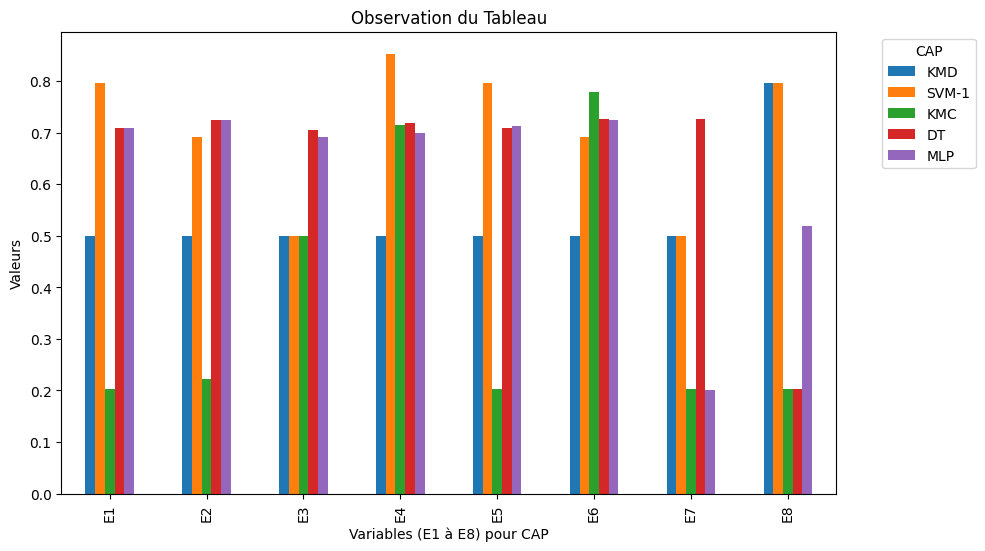

In [677]:
plot_table_observation(tableCap, 'CAP')

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    Pour une data sans aucune transformation (E1) on peut conclure que SVM-1 a donnée le CAP le plus elevé qui est egale presque 0.8<br>
    Pour une data avec GMM  (E2) on peut conclure que DT et MLP ont donnée le CAP le plus elevé qui est egale presque 0.73<br>
    Pour une data avec PCA (E3) on peut conclure que DT a donnée le CAP le plus elevé qui est egale presque 0.7<br>
    Pour une data avec PCA et GMM (E4) on peut conclure que SVM-1 a donnée le CAP le plus elevé qui est egale presque 0.9<br>
    Pour une data normalisée (E5) on peut conclure que SVM-1 a donnée le CAP le plus elevé qui est egale presque 0.8<br>
    Pour une data normalisée avec GMM (E6) on peut conclure que KM-C a donnée le CAP le plus elevé qui est egale environ 0.78<br>
    Pour une data normalisée avec PCA  (E7) on peut conclure que DT a donnée le CAP le plus elevé qui est egale presque 0.8<br>
    Pour une data normalisée avec PCA et GMM (E8) on peut conclure que KMD et SVM-1 ont donnée le CAP le plus elevé qui est egale presque 0.8<br>
   </div>

In [663]:
# F1
def format_number(num):
    return '{:.4f}'.format(num)


data2 = {
     'F1':['voting','KMD','SVM-1','KMC','DT','MLP'],
    'E1': ['--', y_raw_kmd_f1 , y_raw_svm1_f1, y_raw_kmc_f1, y_raw_dt_f1, y_raw_mlp_f1],
    'E2': [y_raw_probs_votingF1, y_raw_probs_kmd_f1, y_raw_probs_SVM1_f1, y_raw_probs_kmc_f1, y_raw_probs_dt_f1, y_raw_probs_mlp_f1],
    'E3': ['--', y_raw_pca_kmd_f1, y_raw_pca_SVM1_f1, y_raw_pca_kmc_f1, y_raw_pca_dt_f1, y_raw_pca_mlp_f1],
    'E4': [y_raw_pca_probs_votingF1, y__raw_pca_probs_kmd_f1, y_raw_pca_probsSVM1_f1, y_raw_pca_probs_kmc_f1, y_raw_pca_probs_dt_f1, y_raw_pca_probs_probs_mlp_f1],
    'E5': ['--', y_norm_kmd_f1, y_norm_svm1_f1, y_norm_kmc_f1, y_norm_dt_f1, y_norm_mlp_f1],
    'E6': [y_norm_probs_votingF1, y_norm_probs_kmd_f1, y_norm_probsSVM1_f1, y_norm_probs_kmc_f1, y_norm_probs_dt_f1, y_norm_probs_mlp_f1],
    'E7': ['--', y_norm_pca_kmd_f1, y_norm_pca_svm1_f1, y_norm_pca_kmc_f1, y_norm_pca_dt_f1, y_norm_pca_mlp_f1],
    'E8': [y_norm_pca_probs_voting_f1,y_norm_pca_probs_kmd_f1, y_norm_pca_probs_svm1_f1, y_norm_pca_probs_kmc_f1, y_norm_pca_probs_dt_f1, y_norm_pca_probs_mlp_f1],
    
}


table2 = pd.DataFrame(data2)




print(table2)


       F1        E1        E2        E3        E4        E5        E6  \
0  voting        --  0.831737        --  0.000000        --  0.831737   
1     KMD       0.0  0.828013  0.828013  0.828013  0.828013  0.828013   
2   SVM-1    0.8605  0.885060  0.827885  0.928268    0.8605  0.885060   
3     KMC   0.22862  0.159396       0.0  0.630339   0.22862  0.877199   
4      DT  0.857346  0.868688   0.85216  0.814731  0.857722  0.868050   
5     MLP  0.857456  0.867815  0.850871  0.808375  0.857974  0.867708   

         E7        E8  
0        --  0.831737  
1       0.0  0.860500  
2  0.828013  0.860500  
3   0.22862  0.228620  
4  0.830731  0.228346  
5  0.239767  0.830756  


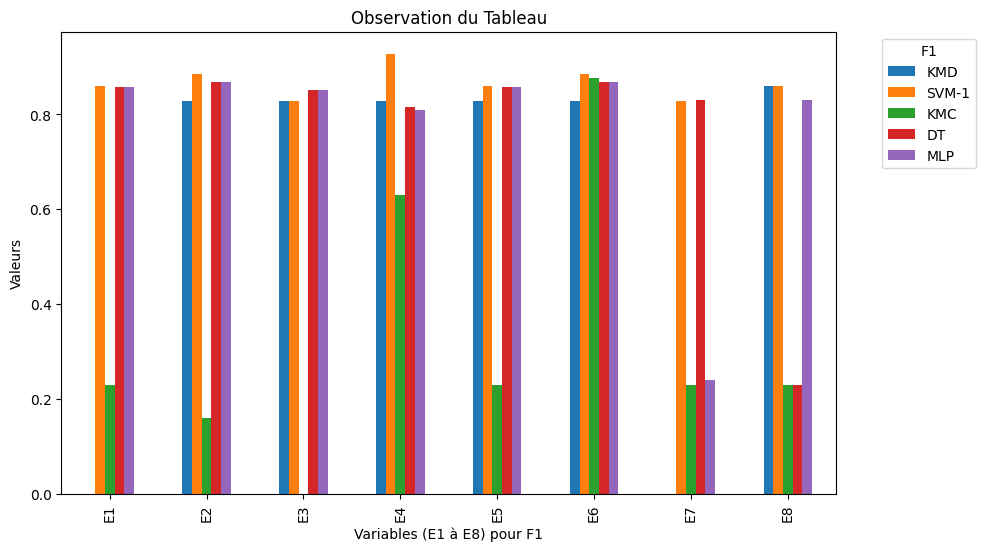

In [664]:
plot_table_observation(table2, 'F1')

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    Pour une data sans aucune transformation (E1) on peut conclure que MLP a donnée le F1-score le plus elevé qui est egale environ 0.84<br>
    Pour une data avec GMM  (E2) on peut conclure que SVM-1 a donnée le F1-score le plus elevé qui est egale presque 0.86<br>
    Pour une data avec PCA (E3) on peut conclure que MLP a donnée le F1-score le plus elevé qui est egale environ 0.83<br>
    Pour une data avec PCA et GMM (E4) on peut conclure que SVM-1 a donnée le F1-score le plus elevé qui est egale presque 0.9<br>
    Pour une data normalisée (E5) on peut conclure que MLP a donnée le F1-score le plus elevé qui est egale presque 0.83<br>
    Pour une data normalisée avec GMM (E6) on peut conclure que SVM-1 a donnée le F1-score le plus elevé qui est egale environ 0.84<br>
    Pour une data normalisée avec PCA  (E7) on peut conclure que DT a donnée le F1-score le plus elevé qui est egale presque 0.8<br>
    Pour une data normalisée avec PCA et GMM (E8) on peut conclure que KMD a donnée le F1-score le plus elevé qui est egale presque 0.84<br>
   </div>

In [665]:
# F1
def format_number(num):
    return '{:.4f}'.format(num)


data = {
     'Sensitivity':['voting','KMD','SVM-1','KMC','DT','MLP'],
    'E1': ['--', y_raw_kmd_sensitivity , y_raw_svm1_sensitivity, y_raw_kmc_sensitivity, y_raw_dt_sensitivity, y_raw_mlp_sensitivity],
    'E2': [y_raw_probs_votingsensivity, y_raw_probs_kmd_sensitivity, y_raw_probs_SVM1_sensitivity, y_raw_probs_kmc_sensitivity, y_raw_probs_dt_sensitivity, y_raw_probs_mlp_sensitivity],
    'E3': ['--', y_raw_pca_kmd_sensitivity, y_raw_pca_SVM1_sensitivity, y_raw_pca_kmc_sensitivity, y_raw_pca_dt_sensitivity, y_raw_pca_mlp_sensitivity],
    'E4': [y_raw_pca_probs_votingsensitivity, y__raw_pca_probs_kmd_sensitivity, y_raw_pca_probsSVM1_sensitivity, y_raw_pca_probs_kmc_sensitivity, y_raw_pca_probs_dt_sensitivity, y_raw_pca_probs_mlp_sensitivity],
    'E5': ['--', y_norm_kmd_sensitivity, y_norm_svm1_sensitivity, y_norm_kmc_sensitivity, y_norm_dt_sensitivity, y_norm_mlp_sensitivity],
    'E6': [y_norm_probs_votingsensitivity, y_norm_probs_kmd_sensitivity, y_norm_probsSVM1_sensitivity, y_norm_probs_kmc_sensitivity, y_norm_probs_dt_sensitivity, y_norm_mlp_probs_sensitivity],
    'E7': ['--', y_norm_pca_kmd_sensitivity, y_norm_pca_svm1_sensitivity, y_norm_pca_kmc_sensitivity, y_norm_pca_dt_sensitivity, y_norm_mlp_pca_sensitivity],
    'E8': [y_norm_pca_probs_voting_sensitivity,y_norm_pca_probs_kmd_sensitivity, y_norm_pca_probs_svm1_sensitivity, y_norm_pca_probs_kmc_sensitivity, y_norm_pca_probs_dt_sensitivity, y_norm_mlp_pca_probs_sensitivity],
    
}


table = pd.DataFrame(data)




print(table)


  Sensitivity        E1        E2        E3        E4        E5        E6  \
0      voting        --  0.999425        --  0.000000        --  0.999425   
1         KMD       0.0  1.000000       1.0  1.000000       1.0  1.000000   
2       SVM-1   0.83015  0.995972  0.999655  0.956041   0.83015  0.995972   
3         KMC  0.169965  0.110587       0.0  0.467894  0.169965  0.889413   
4          DT  0.901151  0.916571  0.891139  0.787917  0.901151  0.914499   
5         MLP  0.901266  0.915650  0.898849  0.788608  0.899194  0.914039   

         E7        E8  
0        --  0.000000  
1       0.0  0.830150  
2       1.0  0.830150  
3  0.169965  0.169965  
4  0.997929  0.169735  
5  0.180322  0.992175  


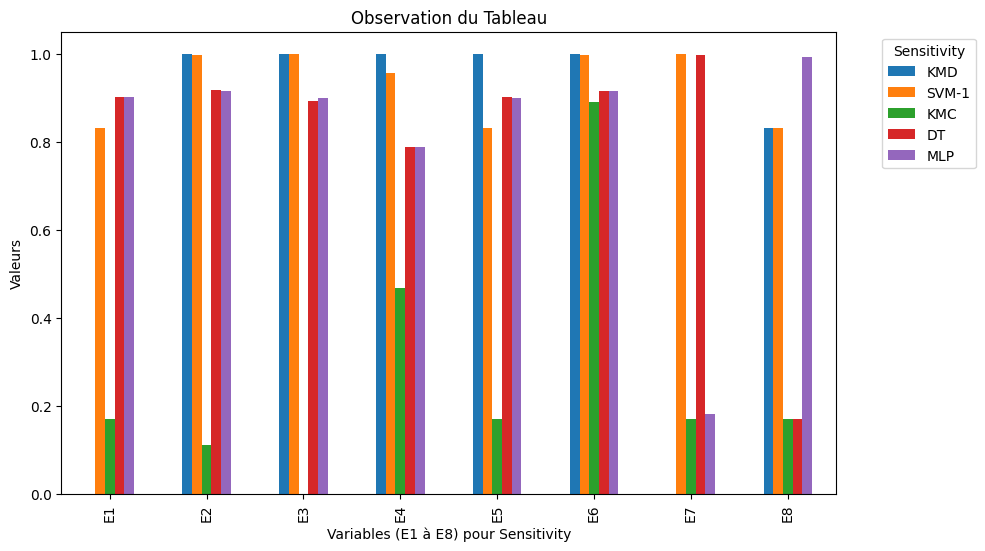

In [666]:
plot_table_observation(table, 'Sensitivity')

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    Pour une data sans aucune transformation (E1) on peut conclure que MLP a donnée le sensitivity le plus elevé qui est egale environ 0.9<br>
    Pour une data avec GMM  (E2) on peut conclure que DT a donnée le sensitivity le plus elevé qui est egale presque 0.9<br>
    Pour une data avec PCA (E3) on peut conclure que MLP a donnée le sensitivity le plus elevé qui est egale environ 0.9<br>
    Pour une data avec PCA et GMM (E4) on peut conclure que KMD a donnée le sensitivity le plus elevé qui est egale presque 0.97<br>
    Pour une data normalisée (E5) on peut conclure que DT a donnée le sensitivity le plus elevé qui est egale presque 0.85<br>
    Pour une data normalisée avec GMM (E6) on peut conclure que KMD a donnée le sensitivity le plus elevé qui est egale environ 0.94<br>
    Pour une data normalisée avec PCA  (E7) on peut conclure que SVM-1 a donnée le sensitivity le plus elevé qui est egale presque 0.96<br>
    Pour une data normalisée avec PCA et GMM (E8) on peut conclure que KMD a donnée le sensitivity le plus elevé qui est egale presque 0.87<br>
   </div>

## Interpretation finale